# Analysis

## 1. Import Modules

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import seaborn as sns

path_parent = os.path.dirname(os.getcwd())

# if os.getcwd()[-8:] != 'HEALTH-ECONS':
#     os.chdir(path_parent)

print(os.getcwd())

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})

/Users/samaypanwar/storage/University/Y4S2/HEALTH ECONS/group_project


## 2. Dataset Information

In [2]:
df_premiums = pd.read_csv('data/main_data_file.csv')
df_premiums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97134 entries, 0 to 97133
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   State Code                                             97134 non-null  object 
 1   FIPS County Code                                       97134 non-null  int64  
 2   County Name                                            97134 non-null  object 
 3   Metal Level                                            97134 non-null  object 
 4   Issuer Name                                            97134 non-null  object 
 5   Premium Adult Individual Age 21                        97134 non-null  float64
 6   Medical Deductible - Individual - Standard             97134 non-null  float64
 7   Medical Maximum Out Of Pocket - Individual - Standard  97134 non-null  float64
 8   Time Trend                                     

In [3]:
df_covid = pd.read_csv('data/year_and_statewise_covid_cases.csv')
df_covid = df_covid.rename(columns = {
        'state': 'State Code',
        'date_updated': 'Time Trend',
        'new_cases': 'Cases'
        })

df_covid['Time Trend'] = list(map(lambda x: x.year, pd.to_datetime(df_covid['Time Trend'])))
print(df_covid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State Code  177 non-null    object
 1   Time Trend  177 non-null    int64 
 2   Cases       177 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.3+ KB
None


### 2.1 Value Counts


In [4]:
print(df_premiums['State Code'].value_counts().head(10))

TX    15013
FL    10023
MI     7595
GA     7584
SC     6274
NC     6094
IL     4131
OK     3994
MO     3906
OH     3502
Name: State Code, dtype: int64


In [5]:
print(df_premiums['County Name'].value_counts().head(10))

Marion        776
Jackson       696
Washington    671
Jefferson     670
Lincoln       621
Clay          585
Union         580
Monroe        569
Calhoun       553
Lake          524
Name: County Name, dtype: int64


In [6]:
df_premiums['Time Trend'].value_counts()

2022    20664
2021    19238
2020    17100
2017    16698
2019    11946
2018    11488
Name: Time Trend, dtype: int64

## 3. Plots for Numeric Data

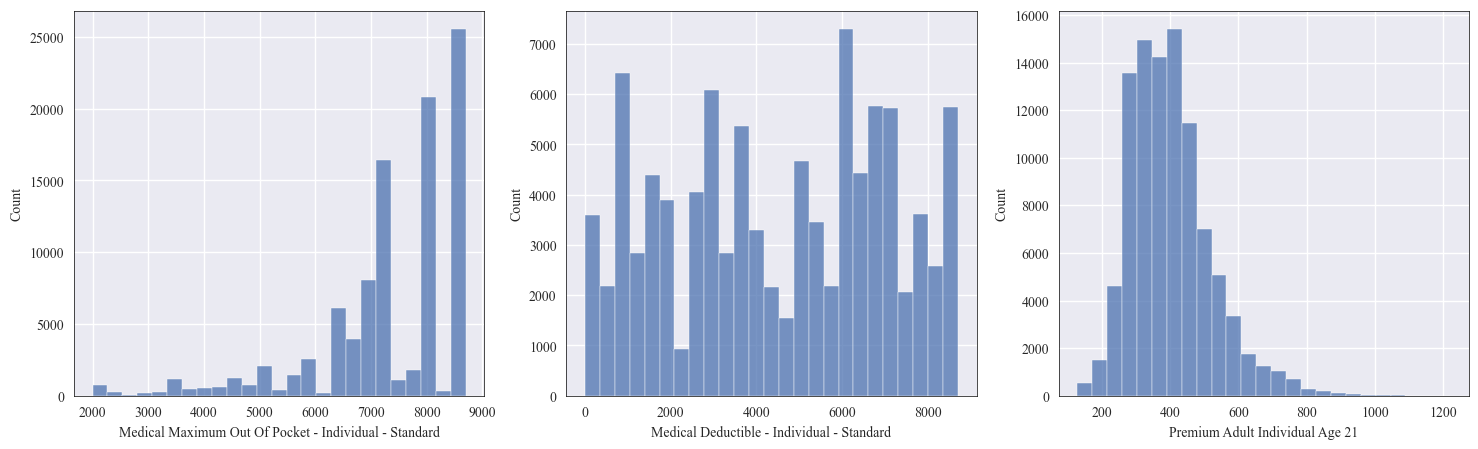

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
sns.histplot(df_premiums['Medical Maximum Out Of Pocket - Individual - Standard'], bins = 25, ax=ax[0]);
sns.histplot(df_premiums['Medical Deductible - Individual - Standard'], bins = 25, ax=ax[1]);
sns.histplot(df_premiums['Premium Adult Individual Age 21'], bins = 25, ax=ax[2]);

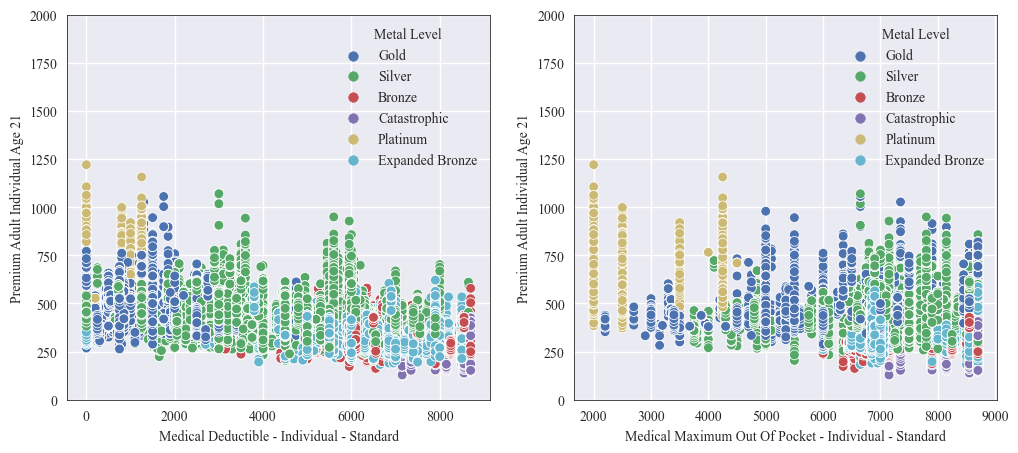

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.scatterplot(data = df_premiums, x = df_premiums['Medical Deductible - Individual - Standard'], y = df_premiums['Premium Adult Individual Age 21'], ax=ax[0], hue = df_premiums['Metal Level']);
sns.scatterplot(data = df_premiums, x = df_premiums['Medical Maximum Out Of Pocket - Individual - Standard'], y = df_premiums['Premium Adult Individual Age 21'], ax=ax[1], hue = df_premiums['Metal Level']);
ax[0].set_ylim(0, 2000);
ax[1].set_ylim(0, 2000);
# sns.scatterplot(data = df_premiums, x = df_premiums['Medical Deductible - Individual - Standard'], y = df_premiums['Premium Adult Individual Age 21'], ax=ax[0]);


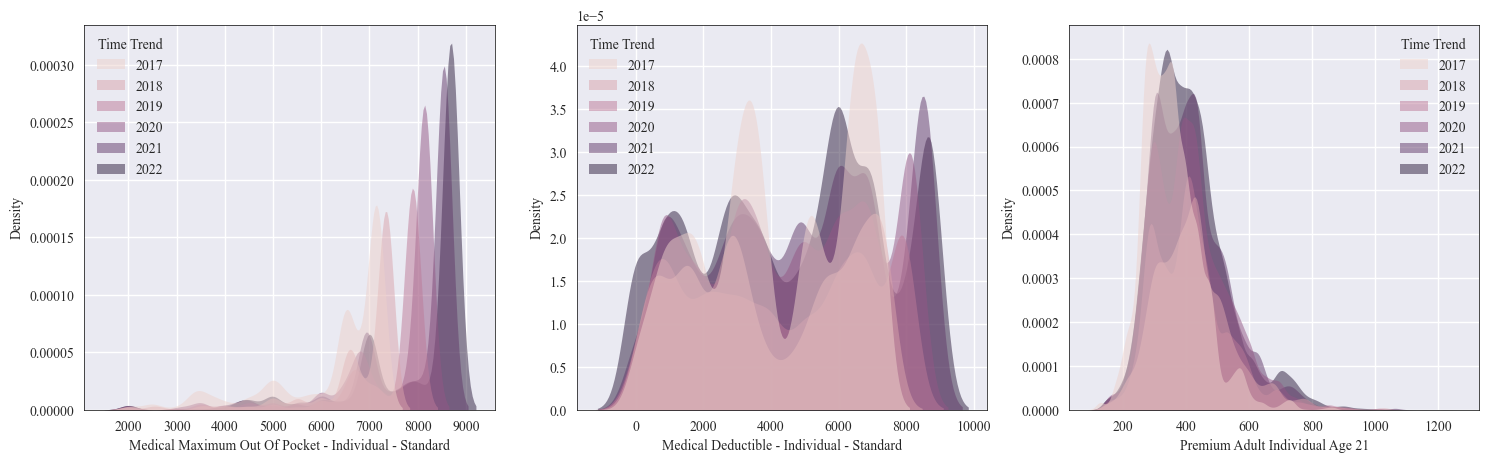

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
plot1 = sns.kdeplot(data = df_premiums, x = 'Medical Maximum Out Of Pocket - Individual - Standard', hue = 'Time Trend', ax=ax[0], fill=True,
   alpha=.5, linewidth=0);
plot2 = sns.kdeplot(data = df_premiums, x = 'Medical Deductible - Individual - Standard', hue = 'Time Trend', ax=ax[1], fill=True,
   alpha=.5, linewidth=0);
plot3 = sns.kdeplot(data = df_premiums, x = 'Premium Adult Individual Age 21', hue = 'Time Trend', ax=ax[2], fill=True,
   alpha=.5, linewidth=0);

sns.move_legend(plot1, "upper left")
sns.move_legend(plot2, "upper left")
sns.move_legend(plot3, "upper right")

<Axes: xlabel='Time Trend', ylabel='Premium Adult Individual Age 21'>

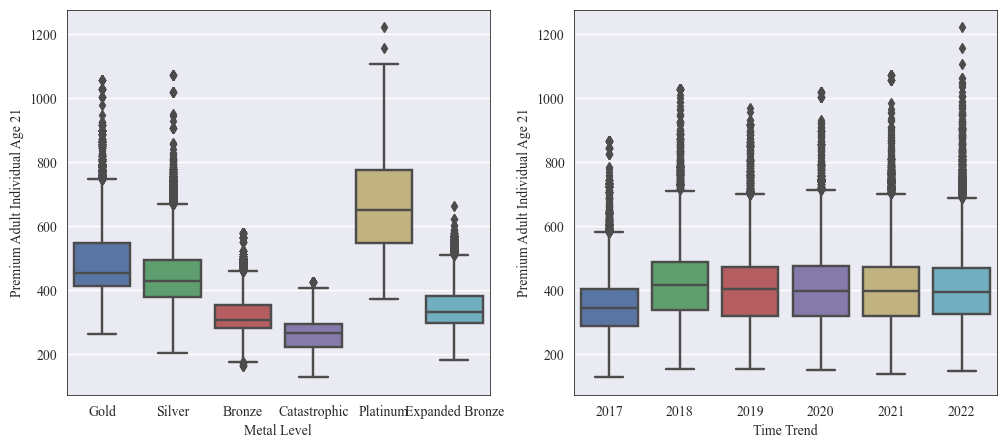

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.boxplot(y = df_premiums['Premium Adult Individual Age 21'], x = df_premiums['Metal Level'], ax=ax[0])
sns.boxplot(y = df_premiums['Premium Adult Individual Age 21'], x = df_premiums['Time Trend'], ax=ax[1])

<Axes: xlabel='Time Trend', ylabel='Premium Adult Individual Age 21'>

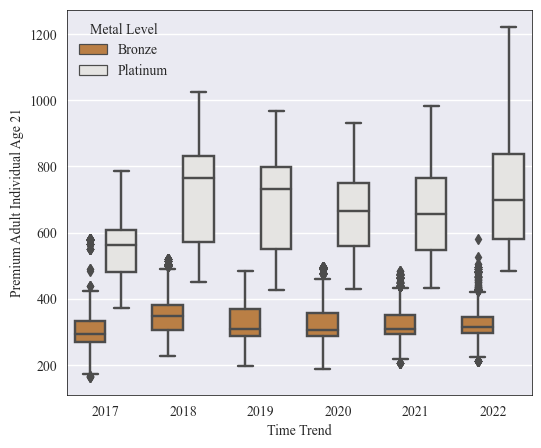

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))
sns.boxplot(data = df_premiums[df_premiums['Metal Level'].isin(['Platinum', 'Bronze'])], y = 'Premium Adult Individual Age 21', x = 'Time Trend', ax=ax, hue = 'Metal Level', palette = ['#CD7F32', '#e5e4e2'])

In [12]:
df_premiums['Time Trend'].tail()

97129    2022
97130    2022
97131    2022
97132    2022
97133    2022
Name: Time Trend, dtype: int64

In [13]:
df_premiums[df_premiums['Metal Level'].isin(['Platinum', 'Bronze']) & df_premiums['Time Trend'].isin([2017, 2022])]

,State Code,FIPS County Code,County Name,Metal Level,Issuer Name,Premium Adult Individual Age 21,Medical Deductible - Individual - Standard,Medical Maximum Out Of Pocket - Individual - Standard,Time Trend
2,AK,2013,Aleutians East,Bronze,Premera Blue Cross Blue Shield of Alaska,580.00,6350.0,7150.0,2017
3,AK,2013,Aleutians East,Bronze,Premera Blue Cross Blue Shield of Alaska,578.00,5250.0,6500.0,2017
7,AK,2016,Aleutians West,Bronze,Premera Blue Cross Blue Shield of Alaska,580.00,6350.0,7150.0,2017
8,AK,2016,Aleutians West,Bronze,Premera Blue Cross Blue Shield of Alaska,578.00,5250.0,6500.0,2017
12,AK,2020,Anchorage,Bronze,Premera Blue Cross Blue Shield of Alaska,551.00,6350.0,7150.0,2017
...,...,...,...,...,...,...,...,...,...
97113,WY,56043,Washakie,Bronze,Blue Cross Blue Shield of Wyoming,428.27,8550.0,8550.0,2022
97117,WY,56043,Washakie,Bronze,Blue Cross Blue Shield of Wyoming,401.63,8550.0,8550.0,2022
97126,WY,56045,Weston,Bronze,Blue Cross Blue Shield of Wyoming,427.50,6500.0,8550.0,2022
97127,WY,56045,Weston,Bronze,Blue Cross Blue Shield of Wyoming,428.27,8550.0,8550.0,2022


<Axes: xlabel='Metal Level', ylabel='Premium Adult Individual Age 21'>

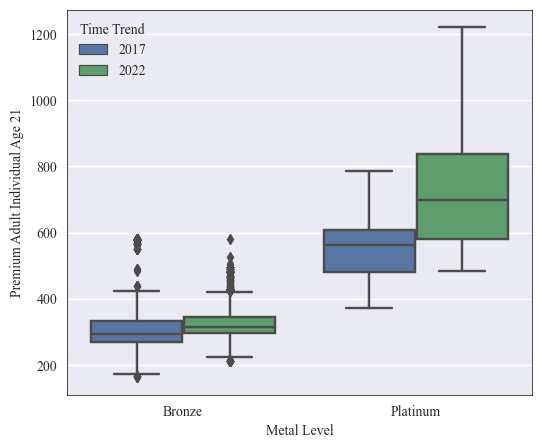

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))
sns.boxplot(data = df_premiums[df_premiums['Metal Level'].isin(['Platinum', 'Bronze']) & df_premiums['Time Trend'].isin([2017, 2022])], y = 'Premium Adult Individual Age 21', x = 'Metal Level', ax=ax, hue = 'Time Trend')

<Axes: xlabel='Time Trend', ylabel='Premium Adult Individual Age 21'>

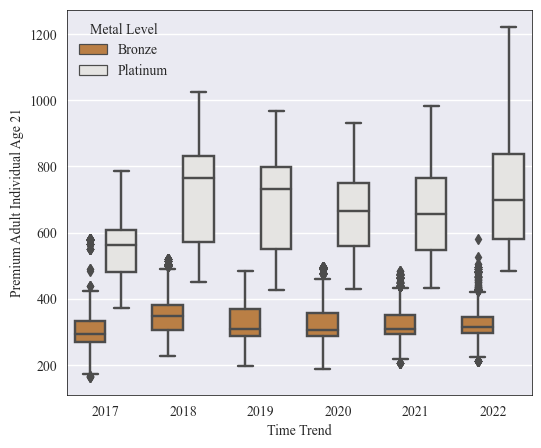

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))
sns.boxplot(data = df_premiums[df_premiums['Metal Level'].isin(['Platinum', 'Bronze'])], y = 'Premium Adult Individual Age 21', x = 'Time Trend', ax=ax, hue = 'Metal Level', palette = ['#CD7F32', '#e5e4e2'])

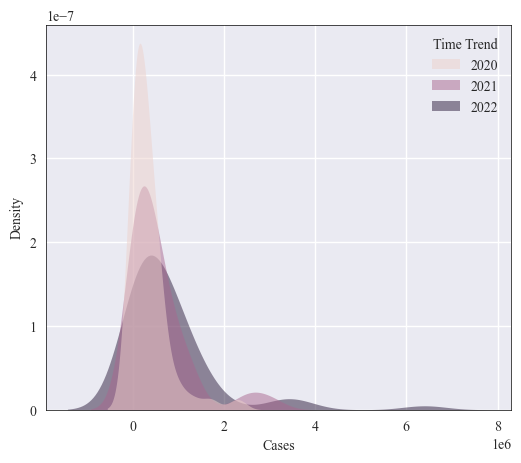

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))

sns.kdeplot(x = df_covid['Cases'], fill=True,
   alpha=.5, linewidth=0, hue = df_covid['Time Trend']);

Model:

premium = max_oop + deductible + state_dummies + covid + state_dummies x covid + state_dummies x covid + covid_cases_in_state x state_dummies x covid + metal_level


## 4. KS Normality Test

In [17]:
from scipy.stats import kstest
import scipy
def multivariate_ks(series):

    statistic = []
    pvalue = []

    for col in series.columns:
        result = kstest(rvs = series[col], cdf = scipy.stats.norm.cdf)
        statistic.append(result.statistic)
        pvalue.append(result.pvalue)

    return pd.DataFrame(data = {'statistic': statistic, 'pvalue': pvalue}, index = series.columns)


In [18]:
numeric_variables = [
        'Premium Adult Individual Age 21',
        'Medical Deductible - Individual - Standard',
        'Medical Maximum Out Of Pocket - Individual - Standard',
        ]
print(multivariate_ks(df_premiums[numeric_variables]))

                                                    statistic  pvalue
Premium Adult Individual Age 21                      1.000000     0.0
Medical Deductible - Individual - Standard           0.968384     0.0
Medical Maximum Out Of Pocket - Individual - St...   1.000000     0.0


## 5. Create Dummies

In [19]:

df_political = pd.read_csv('data/cleaned_political_data.csv')
df_political

,State Code,Time Trend,Unity
0,AL,2017,Rep
1,AK,2017,Divided
2,AZ,2017,Rep
3,AR,2017,Rep
4,CA,2017,Dem
...,...,...,...
345,VA,2023,Divided
346,WA,2023,Dem
347,WV,2023,Rep
348,WI,2023,Divided


<Axes: xlabel='Metal Level', ylabel='Premium Adult Individual Age 21'>

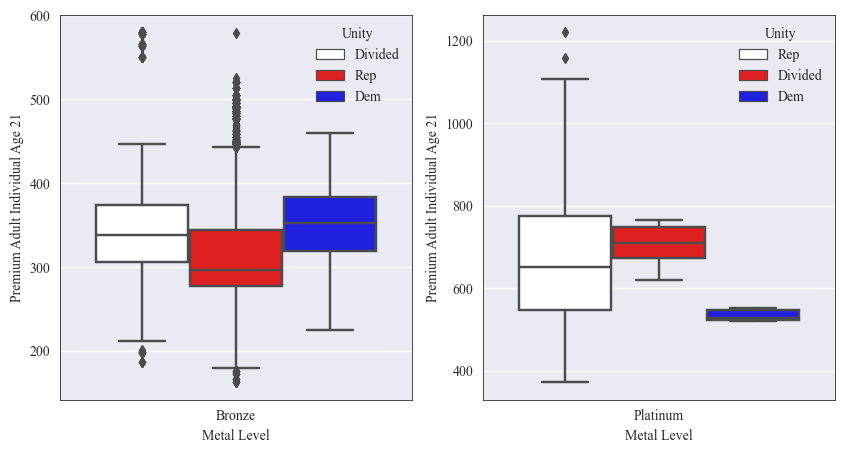

In [20]:
df_regression = pd.merge(df_premiums, df_covid,  how='left', left_on=['State Code','Time Trend'], right_on = ['State Code', 'Time Trend'])

df_regression = pd.merge(df_regression, df_political,  how='left', left_on=['State Code','Time Trend'], right_on = ['State Code', 'Time Trend'])

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
sns.boxplot(data = df_regression[df_regression['Metal Level'].isin(['Bronze'])], y = 'Premium Adult Individual Age 21', x = 'Metal Level', ax=ax[0], hue = 'Unity', palette = ['white', 'red', 'blue'])

sns.boxplot(data = df_regression[df_regression['Metal Level'].isin(['Platinum'])], y = 'Premium Adult Individual Age 21', x = 'Metal Level', ax=ax[1], hue = 'Unity', palette = ['white', 'red', 'blue'])


<Axes: xlabel='State Code'>

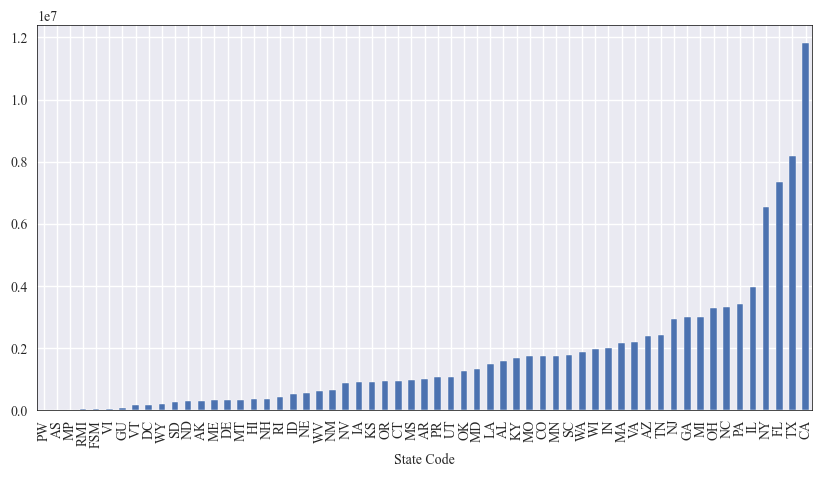

In [36]:
df_covid.groupby('State Code')['Cases'].sum().sort_values().plot(kind = 'bar', figsize = (10, 5))

In [37]:
import statsmodels.api as sm

state_dummies = pd.get_dummies(df_premiums['State Code'])
plan_type = pd.get_dummies(df_premiums['Metal Level'])


df_regression = pd.merge(df_premiums, df_covid,  how='left', left_on=['State Code','Time Trend'], right_on = ['State Code', 'Time Trend'])

df_regression = pd.merge(df_regression, df_political,  how='left', left_on=['State Code','Time Trend'], right_on = ['State Code', 'Time Trend'])
df_regression.Cases = df_regression.Cases.fillna(0) / 1_000
# df_regression.info()

cols_to_drop = [
        'State Code',
        'FIPS County Code',
        'County Name',
        'Metal Level',
        'Issuer Name',
        'Time Trend',
        'Unity'
        ]

year_dummy = pd.get_dummies(df_regression['Time Trend'])
political_dummies = pd.get_dummies(df_regression['Unity'])
df_regression.drop(cols_to_drop, axis=1, inplace = True)
df_regression = pd.concat([df_regression, state_dummies, plan_type, year_dummy, political_dummies], axis=1)

dummies_to_drop = [
        'Catastrophic', # Base Metal Plan
        'NH', # Base State
        2017, # Base Year
        "Divided"
        ]

df_regression.drop(dummies_to_drop, axis=1, inplace = True)

df_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97134 entries, 0 to 97133
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Premium Adult Individual Age 21                        97134 non-null  float64
 1   Medical Deductible - Individual - Standard             97134 non-null  float64
 2   Medical Maximum Out Of Pocket - Individual - Standard  97134 non-null  float64
 3   Cases                                                  97134 non-null  float64
 4   AK                                                     97134 non-null  uint8  
 5   AL                                                     97134 non-null  uint8  
 6   AR                                                     97134 non-null  uint8  
 7   AZ                                                     97134 non-null  uint8  
 8   DE                                            

In [38]:
df_regression.columns

Index([                      'Premium Adult Individual Age 21',
                  'Medical Deductible - Individual - Standard',
       'Medical Maximum Out Of Pocket - Individual - Standard',
                                                       'Cases',
                                                          'AK',
                                                          'AL',
                                                          'AR',
                                                          'AZ',
                                                          'DE',
                                                          'FL',
                                                          'GA',
                                                          'IL',
                                                          'IN',
                                                          'KS',
                                                          'KY',
                                        

In [39]:
import logging

#now we will Create and configure logger
logging.basicConfig(filename="log.log",
					format='%(message)s',
					filemode='w')

#Let us Create an object
logger=logging.getLogger()

#Now we are going to Set the threshold of logger to DEBUG
logger.setLevel(logging.DEBUG)


In [40]:
# dependent_variable = 'Premium Adult Individual Age 21'
# independent_variables = df_regression.columns.difference([dependent_variable])
# Y = df_regression[dependent_variable]
# X = df_regression[independent_variables]
#
# mod = sm.OLS(Y, X)
# res = mod.fit(cov_type = "HC0", use_t = True)
# !echo "" > log.log
# logger.info(res.summary())

In [41]:
df_regression.head()

,Premium Adult Individual Age 21,Medical Deductible - Individual - Standard,Medical Maximum Out Of Pocket - Individual - Standard,Cases,AK,AL,AR,AZ,DE,FL,...,Gold,Platinum,Silver,2018,2019,2020,2021,2022,Dem,Rep
0,866.0,1500.0,5000.0,0.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,743.0,3000.0,7150.0,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,580.0,6350.0,7150.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,578.0,5250.0,6500.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,723.0,3000.0,4100.0,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable] + year_dummy.columns.tolist() + state_dummies.columns.tolist() + plan_type.columns.tolist())
Y = df_regression[dependent_variable]
Y = df_regression[dependent_variable]
X = sm.add_constant(df_regression[independent_variables])

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
!echo "" > log.log
logger.warning("BASE MODEL")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")

In [43]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable] + year_dummy.columns.tolist() + state_dummies.columns.tolist())
Y = df_regression[dependent_variable]
X = sm.add_constant(df_regression[independent_variables])

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
logger.warning("BASE MODEL | PLAN FIXED EFFECTS")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")

In [44]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable] + year_dummy.columns.tolist())
Y = df_regression[dependent_variable]
X = sm.add_constant(df_regression[independent_variables])

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
logger.warning("BASE MODEL | PLAN FIXED EFFECTS + STATE FIXED EFFECTS")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")

In [45]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable])
Y = df_regression[dependent_variable]
X = sm.add_constant(df_regression[independent_variables])

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
logger.warning("BASE MODEL | PLAN FIXED EFFECTS + STATE FIXED EFFECTS + YEAR FIXED EFFECTS")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")

In [46]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable])
Y = df_regression[dependent_variable]
X = sm.add_constant(df_regression[independent_variables])
X = pd.concat([X, plan_type.multiply(df_regression.Cases, axis='index').add_suffix("*Cases")], axis=1)
X = X[X.columns.difference(['Catastrophic*Cases'])]
mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
logger.warning("BASE MODEL | PLAN FIXED EFFECTS + STATE FIXED EFFECTS + YEAR FIXED EFFECTS + INTERACTION TERMS")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")


In [47]:
# fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))
# sns.barplot(data = res.params.filter(like = "*Cases", axis=0).reset_index(), x = )

In [48]:
res.params.filter(like = "*Cases", axis=0).reset_index()

,index,0
0,Bronze*Cases,-0.009710
1,Expanded Bronze*Cases,-0.006287
2,Gold*Cases,-0.018261
3,Platinum*Cases,0.004240
4,Silver*Cases,-0.004534


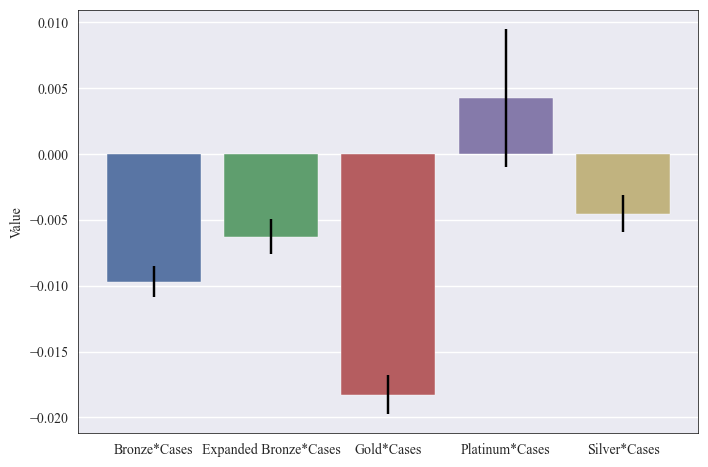

In [49]:
data = pd.concat([res.conf_int().filter(like = "*Cases", axis=0).rename(columns = {0: 'Lower', 1: 'Upper'}), res.params.filter(like = "*Cases", axis=0).rename('Value')], axis=1)

sns.barplot(x=data.index, y=data['Value'])
plt.errorbar(x=data.index, y=data['Value'], yerr=(data['Value'] - data['Lower'], data['Upper'] - data['Value']), fmt='none', color='black', capsize = 1)
plt.show()